# Table of Content

1. [Background](#section1)<br>
2. [Data Loading](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Splitting the data](#section4)<br>
5. [Standardising and training with logistic regression](#section5)<br>
6. [Applying LDA and Logistic Regression](#section6)
7. [Performing LDA with other ML algorithms](#section7)
    - 7.1 [Performing KNN](#section701)<br>
    - 7.2 [Performing SVM](#section702)<br>
    - 7.3 [Linear Discriminant Analysis](#section703)<br>
8. [Conclusion](#section8)

<a id=section1></a>
# 1. Background

There are multiple dimensionality reduction techniques.  Here we will try and understand the real world application and effect of Linear Discriminant Analysis on metrics for a test data-set.

I have always been fascinated by the differences between LDA and PCA. Lets take a quick recap on both the concepts and understand their differences:

## PCA:
Is a linear approach for dimensionality reduction, and performs linear mapping of data from a higher dimensional space in such a manner that the variance is maximised in the low dimensional representation.

## LDA:
This on the other hand attempts to find a linear combination of features that characterize or separate two or more classes - i.e. it specifically attempts to model the difference between classes. It  works on independent variables where each observation are continious quantities. And when dealing with categorical variables, the equivalent technique is called discriminant correspondence analysis.

In a nutshell LDA models the difference between the classes of the data and while PCA does not work to find any such differences, building the features on differences rather than similarities as otherwise seen in LDA.  The discriminant analysis done in LDA is thus different from the factor analysis done in PCA where eigenevalues, eigenevectors and covariance matrix is used.

My favourite representation is:

<img src = "https://raw.githubusercontent.com/insaid2018/Term-4/master/images/lda5.png">

<a id=section2></a>
# 2. Data Loading

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('float_format', '{:f}'.format)
#to ensure that we get readable numbers rather than exponentials

data= pd.read_csv('creditcard.csv')
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0


In [4]:
data.Class.value_counts()

# the dependent variable is 1

0    284315
1       492
Name: Class, dtype: int64

<a id=section3></a>
# 3. Exploratory Data Analysis

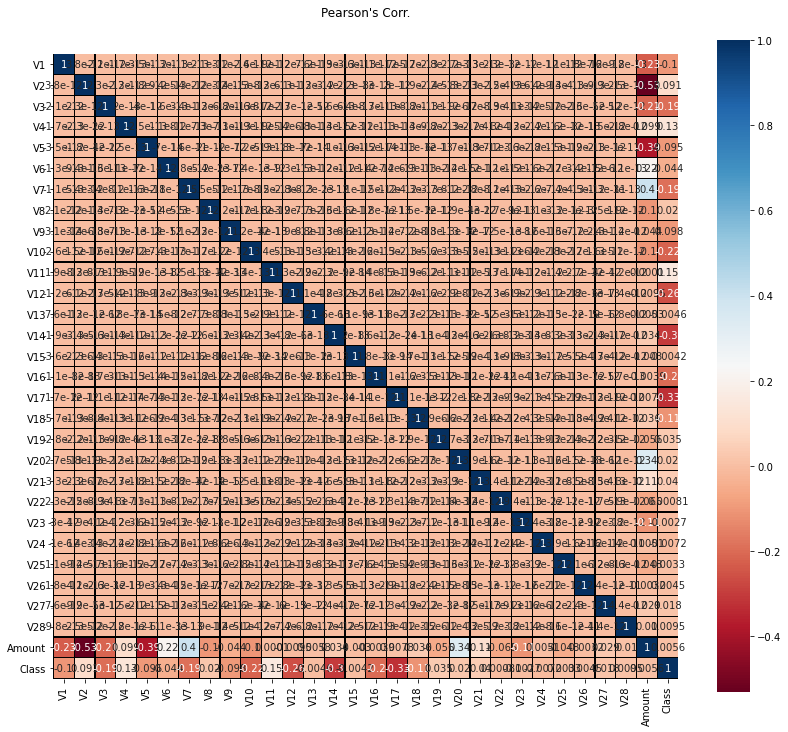

In [5]:
colormap = plt.cm.RdBu

plt.figure(figsize = (14,12))
plt.title("Pearson's Corr.", y = 1.05, size = 12)
sns.heatmap(data.astype(float).corr(),
            linewidths = 0.1,
            vmax= 1.0,
            square = True,
            cmap=colormap,
            linecolor = 'black',
            annot= True);

Very few of the features are correlated

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

All the columns except for the dependent variable are float values with no missing data in it.

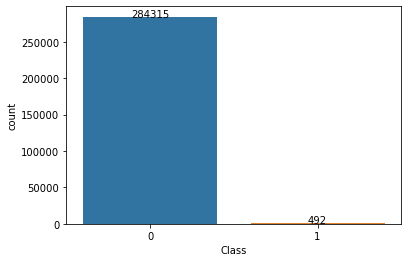

In [7]:
ax = sns.countplot(x = data.Class);
for p in ax.patches:
    height = p.get_height()
    total = len(data)
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{}'.format(height), ha="center")  
    #for percentage get height/total which is len(data) already in code

Clearly the dependent variable is not balanced

In [8]:
pd.set_option('float_format', '{:f}'.format)   #to get human readable numbers rather than exponentials
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,88.349619,0.001727
std,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Clearly the numbers will have to be normalised

<a id=section4></a>
# 4. Splitting the data

In [10]:
X = data.drop(['Class'], axis = 1)
y = data.Class
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

print('X_train -->', X_train.shape)
print('X_test -->', X_test.shape)
print('y_train -->', y_train.shape)
print('y_test -->', y_test.shape)

X_train --> (199364, 29)
X_test --> (85443, 29)
y_train --> (199364,)
y_test --> (85443,)


<a id=section5></a>
# 5. Standardising and training with logistic regression

In [12]:
#first to normalise the data - only fit_transform on Train and
#only transform on the test data

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_sc = SS.fit_transform(X_train)
X_test_sc = SS.transform(X_test)

In [13]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.890000
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.980000
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.100000
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.960000
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.950000


In [14]:
from sklearn.linear_model import LogisticRegression

#fitting the model
lr = LogisticRegression()
fit1=lr.fit(X_train_sc,y_train)
#predicting with the model
y_pred = fit1.predict(X_test_sc)

#evaluating the model - confusion matrix and classification report

from sklearn.metrics import confusion_matrix , classification_report

matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(matrix)
print(report)

[[85284    12]
 [   56    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Since this is to capture anomalous behaviour it is critical that we minimise false positives

<a id=section6></a>
# 6. Applying LDA and Logistic Regression

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train,y_train) 
#taking the whole dataset
X_test = lda.transform(X_test)

print('X_train-->' , X_train.shape)
print('X_test-->', X_test.shape)

X_train--> (199364, 1)
X_test--> (85443, 1)


In [16]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
fit2 = lr2.fit(X_train,y_train)
y_pred2 = fit2.predict(X_test)

#evaluating model - confusion matrix and classification report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm= confusion_matrix(y_test,y_pred2)
cr = classification_report(y_test,y_pred2)

print(cm)
print(cr)

from sklearn.metrics import recall_score

print('Recall Score for prediction is -->', recall_score(y_test,y_pred2))

[[85284    12]
 [   66    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.55      0.67       147

    accuracy                           1.00     85443
   macro avg       0.94      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Recall Score for prediction is --> 0.5510204081632653


<a id=section7></a>
# 7. Performing LDA with other ML algorithms

In [17]:
# preparing afresh

from sklearn.model_selection import train_test_split

X_train,X_test,y_tain,y_test = train_test_split(X,y, test_size = .3, random_state = 0)

print('X_train -->' , X_train.shape)
print('y_train -->', X_test.shape)

X_train --> (199364, 29)
y_train --> (85443, 29)


In [18]:
#applying LDA with eigen this time

lda = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto')
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

print('X_train -->' , X_train.shape)
print('y_train -->', X_test.shape)

X_train --> (199364, 1)
y_train --> (85443, 1)


<a id=section701></a>
## 7.1 Performing KNN

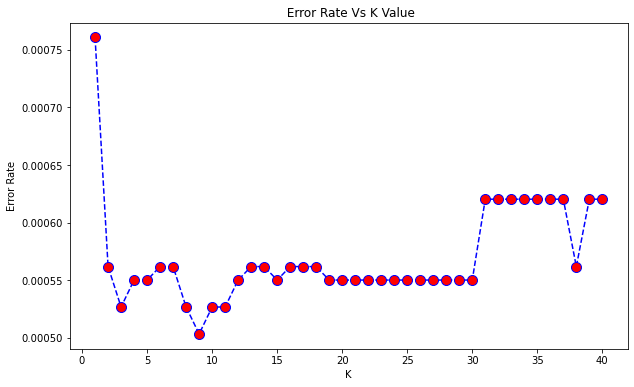

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#critical to choose the best k

error_rate=[]

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors= i, n_jobs = -1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,41),
         error_rate, 
         color = 'blue',
         linestyle = 'dashed',
         marker='o',
         markerfacecolor = 'red',
         markersize = 10)

plt.title(" Error Rate Vs K Value")
plt.xlabel('K')
plt.ylabel('Error Rate');

K should have a value of 9

In [20]:
#running knn basis 9
knn = KNeighborsClassifier(n_neighbors= 9, n_jobs = -1)
knn.fit(X_train,y_train)
pred_knn= knn.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm= confusion_matrix(y_test,y_pred2)
cr = classification_report(y_test,y_pred2)

print(cm)
print(cr)

from sklearn.metrics import recall_score

print('Recall Score for prediction is -->', recall_score(y_test,pred_knn))

[[85284    12]
 [   66    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.55      0.67       147

    accuracy                           1.00     85443
   macro avg       0.94      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Recall Score for prediction is --> 0.7346938775510204


<a id=section702></a>
## 7.2 Performing SVM

In [21]:
# preparing afresh

from sklearn.model_selection import train_test_split

X_train,X_test,y_tain,y_test = train_test_split(X,y, test_size = .3, random_state = 0)

print('X_train -->' , X_train.shape)
print('y_train -->', X_test.shape)

# applying lda

lda = LinearDiscriminantAnalysis(solver='svd')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

print('X_train -->' , X_train.shape)
print('y_train -->', X_test.shape)

# applying Support Vector Classifier

from sklearn.svm import SVC

svc = SVC(C=100, kernel='rbf')
svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)

#model evaluation

cm= confusion_matrix(y_test,pred_svc)
cr = classification_report(y_test,pred_svc)

print(cm)
print(cr)

from sklearn.metrics import recall_score

print('Recall Score for prediction is -->', recall_score(y_test,pred_svc))

X_train --> (199364, 29)
y_train --> (85443, 29)
X_train --> (199364, 1)
y_train --> (85443, 1)
[[85289     7]
 [   37   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Recall Score for prediction is --> 0.7482993197278912


<a id=section703></a>
## 7.3 Performing Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', splitter='random')
tree =dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)

cm = confusion_matrix(y_test,pred_dt)
cr = classification_report(y_test,pred_dt)

print(cm)
print(cr)

print('Recall Score for prediction is -->', recall_score(y_test,pred_dt))

[[85258    38]
 [   37   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.75      0.75       147

    accuracy                           1.00     85443
   macro avg       0.87      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Recall Score for prediction is --> 0.7482993197278912


<a id=section8></a>
### 8. Conclusion

Comparing the results:

|Model Used|Recall Score  |
|--|--|
|LR with Standard Scaling  | 0.81  |
|LDA & LR  | 0.78  |
|LDA & KNN  | 0.78  |
|LDA & SVM | 0.87  |
|LDA & DT  | 0.87  |

What we can clearly see is that LDA with SVM and DT performs the best. 

Interestingly, Logistic Regression performs better on its own with LDA.

Further considerations to be implemented include performing the same algorithms without LDA and also looking at the results, considering that typically DT provides better scores.